# Plant Leaf Classification

Applying machine learning models for classification of plant leaf images

### Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import os
import string

### Reading the dataset

In [2]:
dataset = pd.read_csv("Flavia_features.csv")

In [3]:
dataset.head(5)

,Unnamed: 0,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639688,0.997666,0.911738,1.688689
1,0,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,0,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,0,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440064,0.998419,0.914331,1.673914
4,0,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641447,0.998568,0.898644,1.968081


In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
maindir = r'C:\Users\bhara\Desktop\Plant-Leaf-Identification-master'
ds_path = maindir + "\\Flavia leaves dataset"
img_files = os.listdir(ds_path)
ds_path

'C:\\Users\\bhara\\Desktop\\Plant-Leaf-Identification-master\\Flavia leaves dataset'

### Creating target labels

Breakpoints are used alongside the image file to create a vector of target labels. The breakpoints are specified in Flavia leaves dataset website.

In [6]:
breakpoints = [1001,1059,1060,1122,1552,1616,1123,1194,1195,1267,1268,1323,1324,1385,1386,1437,1497,1551,1438,1496,2001,2050,2051,2113,2114,2165,2166,2230,2231,2290,2291,2346,2347,2423,2424,2485,2486,2546,2547,2612,2616,2675,3001,3055,3056,3110,3111,3175,3176,3229,3230,3281,3282,3334,3335,3389,3390,3446,3447,3510,3511,3563,3566,3621]

In [7]:
target_list = []
for file in img_files:
    target_num = int(file.split(".")[0])
    flag = 0
    i = 0 
    for i in range(0,len(breakpoints),2):
        if((target_num >= breakpoints[i]) and (target_num <= breakpoints[i+1])):
            flag = 1
            break
    if(flag==1):
        target = int((i/2))
        target_list.append(target)
# target_list

In [8]:
y = np.array(target_list)
y
len(y)

1907

In [9]:
X = dataset.iloc[:,1:]

In [10]:
X.head(5)

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,197484.0,3479.036038,1416,759,1.865613,5.442183,61.289480,6.395667,13.643413,4.388007,24.025329,40.200931,21.448412,12.639688,0.997666,0.911738,1.688689
1,101248.0,2490.381812,1190,130,9.153846,1.527931,61.255546,7.049316,9.232018,10.876066,33.816205,37.382221,46.479230,8.137424,0.997191,0.944818,1.193795
2,86570.5,2290.683327,1095,119,9.201681,1.505189,60.612219,3.434303,6.371511,2.644757,19.975699,29.057374,19.275050,8.553729,0.996610,0.959023,0.848758
3,190214.0,2856.479353,1318,254,5.188976,1.759976,42.896287,7.670415,13.303599,6.049157,28.822885,40.221845,26.948604,8.440064,0.998419,0.914331,1.673914
4,227727.0,2917.248904,1324,286,4.629371,1.662798,37.370804,8.992028,16.671171,6.294281,30.967158,45.040192,28.595326,8.641447,0.998568,0.898644,1.968081


In [11]:
y[0:5]

array([0, 0, 0, 0, 0])

### Train test split

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 1)

In [14]:
type(X_train)
X_test

,area,perimeter,physiological_length,physiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
1263,213373.0,3430.623917,1343,857,1.567095,5.394080,55.157778,11.074737,17.294304,8.994616,33.570434,48.311718,29.207326,11.426592,0.997225,0.900899,1.924133
137,799365.5,3593.763963,1081,1042,1.037428,1.409120,16.156739,38.576944,67.175279,27.746684,48.222181,78.847510,37.165548,20.203071,0.997612,0.662076,5.444995
1849,882385.5,4852.651255,1330,1058,1.257089,1.594700,26.687003,49.411832,95.982348,16.947995,55.303775,101.872392,33.297913,3.502674,0.999362,0.743725,5.461152
267,483893.0,5538.658397,1208,1021,1.183154,2.548844,63.395703,18.244701,49.497876,9.948452,36.485573,85.244346,27.051578,29.457538,0.994833,0.771400,3.946930
186,752520.0,3465.708045,994,1046,0.950287,1.381656,15.961213,30.045683,57.007284,23.654540,40.802893,70.784947,33.696530,19.351881,0.998087,0.683292,5.147662
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1504,578096.5,3831.871610,1397,984,1.419715,2.377887,25.399289,12.942036,52.421746,4.022720,26.294686,79.158555,19.330738,12.094588,0.998639,0.780675,4.062704
804,606545.5,3453.832936,1420,697,2.037303,1.631765,19.667052,182.164540,210.288909,173.281752,98.651566,57.697587,110.491154,44.504501,0.996133,0.710523,4.934222
1575,614710.0,4415.433882,1282,1066,1.202627,2.223182,31.715860,28.553670,55.479264,19.891699,44.414070,80.374602,33.318763,22.305791,0.996828,0.728632,4.599616
1090,832295.0,4119.628964,1514,990,1.529293,1.800876,20.391019,36.420822,61.686713,19.778061,44.470569,70.177985,28.573848,11.431320,0.998921,0.694467,5.197582


In [15]:
y_train[0:5]

array([ 4,  9,  3, 15, 27])

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [18]:
X_train[0:2]

array([[-1.227045  , -2.01022875, -1.87583961, -2.05351508,  1.00395209,
        -0.3817777 , -0.38488482, -0.82749007, -1.0497825 , -0.64372502,
        -1.79812462, -2.0797401 , -1.10455749, -0.59323579,  0.97553192,
         1.39941703, -1.4879613 ],
       [ 0.03554163,  0.13170763,  0.56579175, -0.83624904,  0.93118163,
        -0.29951384, -0.23378604, -0.22750802,  0.14018208, -0.46542913,
        -0.0974349 ,  1.94598994, -0.72289959, -0.12253433, -1.33728152,
        -0.14098287,  0.03271052]])

In [19]:
y_train[0:2]

array([4, 9])

### Applying SVM classifier model

In [20]:
from sklearn import svm

In [21]:
clf = svm.SVC()
clf.fit(X_train,y_train)
# Kernel = Radial basis function
# help(svm.SVC.fit)

SVC()

In [22]:
y_pred = clf.predict(X_test)

In [23]:
from sklearn import metrics

In [24]:
metrics.accuracy_score(y_test, y_pred)

0.7905759162303665

In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.45      0.50        20
           1       0.81      0.77      0.79        22
           2       0.83      1.00      0.91        24
           3       0.89      1.00      0.94        16
           4       1.00      0.94      0.97        18
           5       0.92      1.00      0.96        22
           6       0.70      0.94      0.80        17
           7       0.87      0.76      0.81        17
           8       0.44      0.62      0.52        13
           9       0.85      1.00      0.92        11
          10       0.73      0.55      0.63        20
          11       0.87      0.87      0.87        15
          12       0.42      0.73      0.54        15
          13       0.88      0.83      0.86        18
          14       0.82      0.64      0.72        22
          15       0.50      0.27      0.35        15
          16       1.00      1.00      1.00        21
          17       0.80    

### Performing parameter tuning of the model

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
parameters = [{'kernel': ['rbf'],
               'gamma': [1e-4, 1e-3, 0.01, 0.1, 0.2, 0.5],
               'C': [1, 10, 100, 1000]},
              {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}
             ]

In [28]:
svm_clf = GridSearchCV(svm.SVC(decision_function_shape='ovr'), parameters, cv=5)
svm_clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.5],
                          'kernel': ['rbf']},
                         {'C': [1, 10, 100, 1000], 'kernel': ['linear']}])

In [29]:
svm_clf.best_params_

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}

In [30]:
means = svm_clf.cv_results_['mean_test_score']
stds = svm_clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, svm_clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

0.066 (+/-0.040) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.211 (+/-0.021) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.582 (+/-0.010) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.825 (+/-0.042) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.839 (+/-0.048) for {'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
0.849 (+/-0.060) for {'C': 1, 'gamma': 0.5, 'kernel': 'rbf'}
0.211 (+/-0.021) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.588 (+/-0.007) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.830 (+/-0.051) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.882 (+/-0.036) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.878 (+/-0.040) for {'C': 10, 'gamma': 0.2, 'kernel': 'rbf'}
0.856 (+/-0.021) for {'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}
0.590 (+/-0.010) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.814 (+/-0.038) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.892 (+/-0.042) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.885 (+/-0.057) for {'C': 100, 'gamma': 0.1, 'kernel':

In [31]:
y_pred_svm = svm_clf.predict(X_test)

In [32]:
metrics.accuracy_score(y_test, y_pred_svm)

0.900523560209424

In [33]:
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.65      0.65      0.65        20
           1       0.95      0.95      0.95        22
           2       0.96      1.00      0.98        24
           3       0.94      0.94      0.94        16
           4       0.90      1.00      0.95        18
           5       0.92      1.00      0.96        22
           6       0.94      1.00      0.97        17
           7       0.89      1.00      0.94        17
           8       0.73      0.85      0.79        13
           9       1.00      1.00      1.00        11
          10       0.89      0.85      0.87        20
          11       0.88      0.93      0.90        15
          12       0.87      0.87      0.87        15
          13       0.81      0.94      0.87        18
          14       0.87      0.91      0.89        22
          15       0.74      0.93      0.82        15
          16       1.00      1.00      1.00        21
          17       0.95    

### Dimensionality Reduction using PCA

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA()

In [36]:
pca.fit(X)

PCA()

In [37]:
var= pca.explained_variance_ratio_
var

array([9.99992897e-01, 6.41435228e-06, 3.92823847e-07, 2.08041234e-07,
       6.15522716e-08, 1.38782080e-08, 8.94929401e-09, 2.51991531e-09,
       8.66434382e-10, 2.10140133e-10, 1.07067158e-10, 1.32410137e-11,
       2.22567453e-12, 1.41983252e-12, 5.16456383e-13, 3.39149322e-15,
       1.00670170e-17])

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

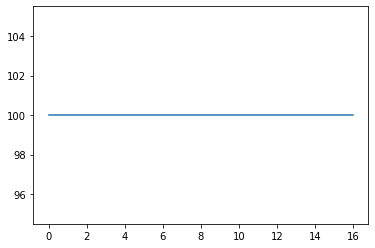

In [39]:
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)

### Testing with mobile captured leaves which are not classified

In [40]:
import os
import cv2

In [41]:
def bg_sub(filename):
    test_img_path = '..\\mobile captures\\' + filename
    main_img = cv2.imread(test_img_path)
    img = cv2.cvtColor(main_img, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(img, (1600, 1200))
    size_y,size_x,_ = img.shape
    gs = cv2.cvtColor(resized_image,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (55,55),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)
    
    contours, hierarchy = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    
    contains = []
    y_ri,x_ri, _ = resized_image.shape
    for cc in contours:
        yn = cv2.pointPolygonTest(cc,(x_ri//2,y_ri//2),False)
        contains.append(yn)

    val = [contains.index(temp) for temp in contains if temp>0]
    index = val[0]
    
    black_img = np.empty([1200,1600,3],dtype=np.uint8)
    black_img.fill(0)
    
    cnt = contours[index]
    mask = cv2.drawContours(black_img, [cnt] , 0, (255,255,255), -1)
    
    maskedImg = cv2.bitwise_and(resized_image, mask)
    white_pix = [255,255,255]
    black_pix = [0,0,0]
    
    final_img = maskedImg
    h,w,channels = final_img.shape
    for x in range(0,w):
        for y in range(0,h):
            channels_xy = final_img[y,x]
            if all(channels_xy == black_pix):
                final_img[y,x] = white_pix
    
    return final_img

In [42]:
filename = 'Test.jpg'
#test_img_path = '..\\mobile captures\\' + filename
#main_img = cv2.imread(test_img_path)
#plt.imshow(main_img)
bg_rem_img = bg_sub(filename)
bg_rem_img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

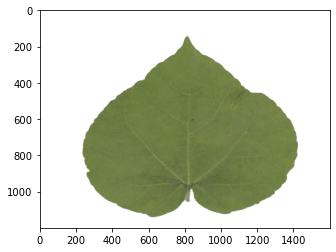

In [43]:
plt.imshow(bg_rem_img)

In [44]:
import mahotas as mt

In [45]:
def feature_extract(img):
    names = ['area','perimeter','pysiological_length','pysiological_width','aspect_ratio','rectangularity','circularity', \
             'mean_r','mean_g','mean_b','stddev_r','stddev_g','stddev_b', \
             'contrast','correlation','inverse_difference_moments','entropy'
            ]
    df = pd.DataFrame([], columns=names)

    #Preprocessing
    gs = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
    blur = cv2.GaussianBlur(gs, (25,25),0)
    ret_otsu,im_bw_otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    kernel = np.ones((50,50),np.uint8)
    closing = cv2.morphologyEx(im_bw_otsu, cv2.MORPH_CLOSE, kernel)

    #Shape features
    contours, _ = cv2.findContours(closing,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    M = cv2.moments(cnt)
    area = cv2.contourArea(cnt)
    perimeter = cv2.arcLength(cnt,True)
    x,y,w,h = cv2.boundingRect(cnt)
    aspect_ratio = float(w)/h
    rectangularity = w*h/area
    circularity = ((perimeter)**2)/area

    #Color features
    red_channel = img[:,:,0]
    green_channel = img[:,:,1]
    blue_channel = img[:,:,2]
    blue_channel[blue_channel == 255] = 0
    green_channel[green_channel == 255] = 0
    red_channel[red_channel == 255] = 0

    red_mean = np.mean(red_channel)
    green_mean = np.mean(green_channel)
    blue_mean = np.mean(blue_channel)

    red_std = np.std(red_channel)
    green_std = np.std(green_channel)
    blue_std = np.std(blue_channel)

    #Texture features
    textures = mt.features.haralick(gs)
    ht_mean = textures.mean(axis=0)
    contrast = ht_mean[1]
    correlation = ht_mean[2]
    inverse_diff_moments = ht_mean[4]
    entropy = ht_mean[8]

    vector = [area,perimeter,w,h,aspect_ratio,rectangularity,circularity,\
              red_mean,green_mean,blue_mean,red_std,green_std,blue_std,\
              contrast,correlation,inverse_diff_moments,entropy
             ]

    df_temp = pd.DataFrame([vector],columns=names)
    df = df.append(df_temp)
    
    return df

In [46]:
features_of_img = feature_extract(bg_rem_img)
features_of_img

,area,perimeter,pysiological_length,pysiological_width,aspect_ratio,rectangularity,circularity,mean_r,mean_g,mean_b,stddev_r,stddev_g,stddev_b,contrast,correlation,inverse_difference_moments,entropy
0,773684.0,3626.349748,1188,994,1.195171,1.526298,16.997136,45.492053,51.317457,28.659909,55.462522,62.42553,35.532876,14.316771,0.998478,0.850455,3.746101


In [47]:
scaled_features = sc_X.transform(features_of_img)
print(scaled_features)
# y_pred_mobile = svm_clf.predict(features_of_img)
y_pred_mobile = svm_clf.predict(scaled_features)
y_pred_mobile[0]

[[ 0.6502853  -0.11745723 -0.50190468  0.49167754 -0.69556504 -0.31809639
  -0.38551414  0.22019195 -0.21292795  0.01822736  0.58107456 -0.4098229
  -0.11546612 -0.47775126  0.82482609  1.04759476 -0.43767765]]


29

In [48]:
common_names = ['pubescent bamboo','Chinese horse chestnut','Anhui Barberry', \
                'Chinese redbud','true indigo','Japanese maple','Nanmu',' castor aralia', \
                'Chinese cinnamon','goldenrain tree','Big-fruited Holly','Japanese cheesewood', \
                'wintersweet','camphortree','Japan Arrowwood','sweet osmanthus','deodar','ginkgo, maidenhair tree', \
                'Crape myrtle, Crepe myrtle','oleander','yew plum pine','Japanese Flowering Cherry','Glossy Privet',\
                'Chinese Toon','peach','Ford Woodlotus','trident maple','Beales barberry','southern magnolia',\
                'Canadian poplar','Chinese tulip tree','tangerine'
               ]
common_names[y_pred_mobile[0]]

'Canadian poplar'